In [1]:
# Imports
import numpy as np
import plotting_master as pm
import run

# -- Parameters --
number_of_companies = 50
number_of_workers = 5 * number_of_companies 
salary_increase = 0.035
interest_rate_free = 0.0 # "variable" or float
mutation_magnitude = 0.1 # Float, "spread", "last_T"
prob_exponent = 4
salary_min = 1e-2
warmup_steps = 3000
time_steps = 400 + warmup_steps 
seed = 300 # np.random.randint(0, 10000)

# Bankruptcy: negative_money, cannot_pay_salary
# mutation: "constant", "spread", "last_T", "minimum", "log", "mean", "worker_opinion", "0_to_mean", "normal", "positive_income"
update_methods = {"worker_update": "limited", 
                  "bankruptcy": "negative_money",
                  "mutation": "positive_income",}


# Create instances
create_data = run.RunWorkForce(number_of_companies, number_of_workers, salary_increase, 
                            interest_rate_free, mutation_magnitude, prob_exponent, salary_min, update_methods, time_steps, seed)
gname = create_data._get_group_name()
plotter = pm.PlotMaster(gname, skip_values=warmup_steps)

### Store values

In [ ]:
create_data.store_data_in_group()

### Plotting

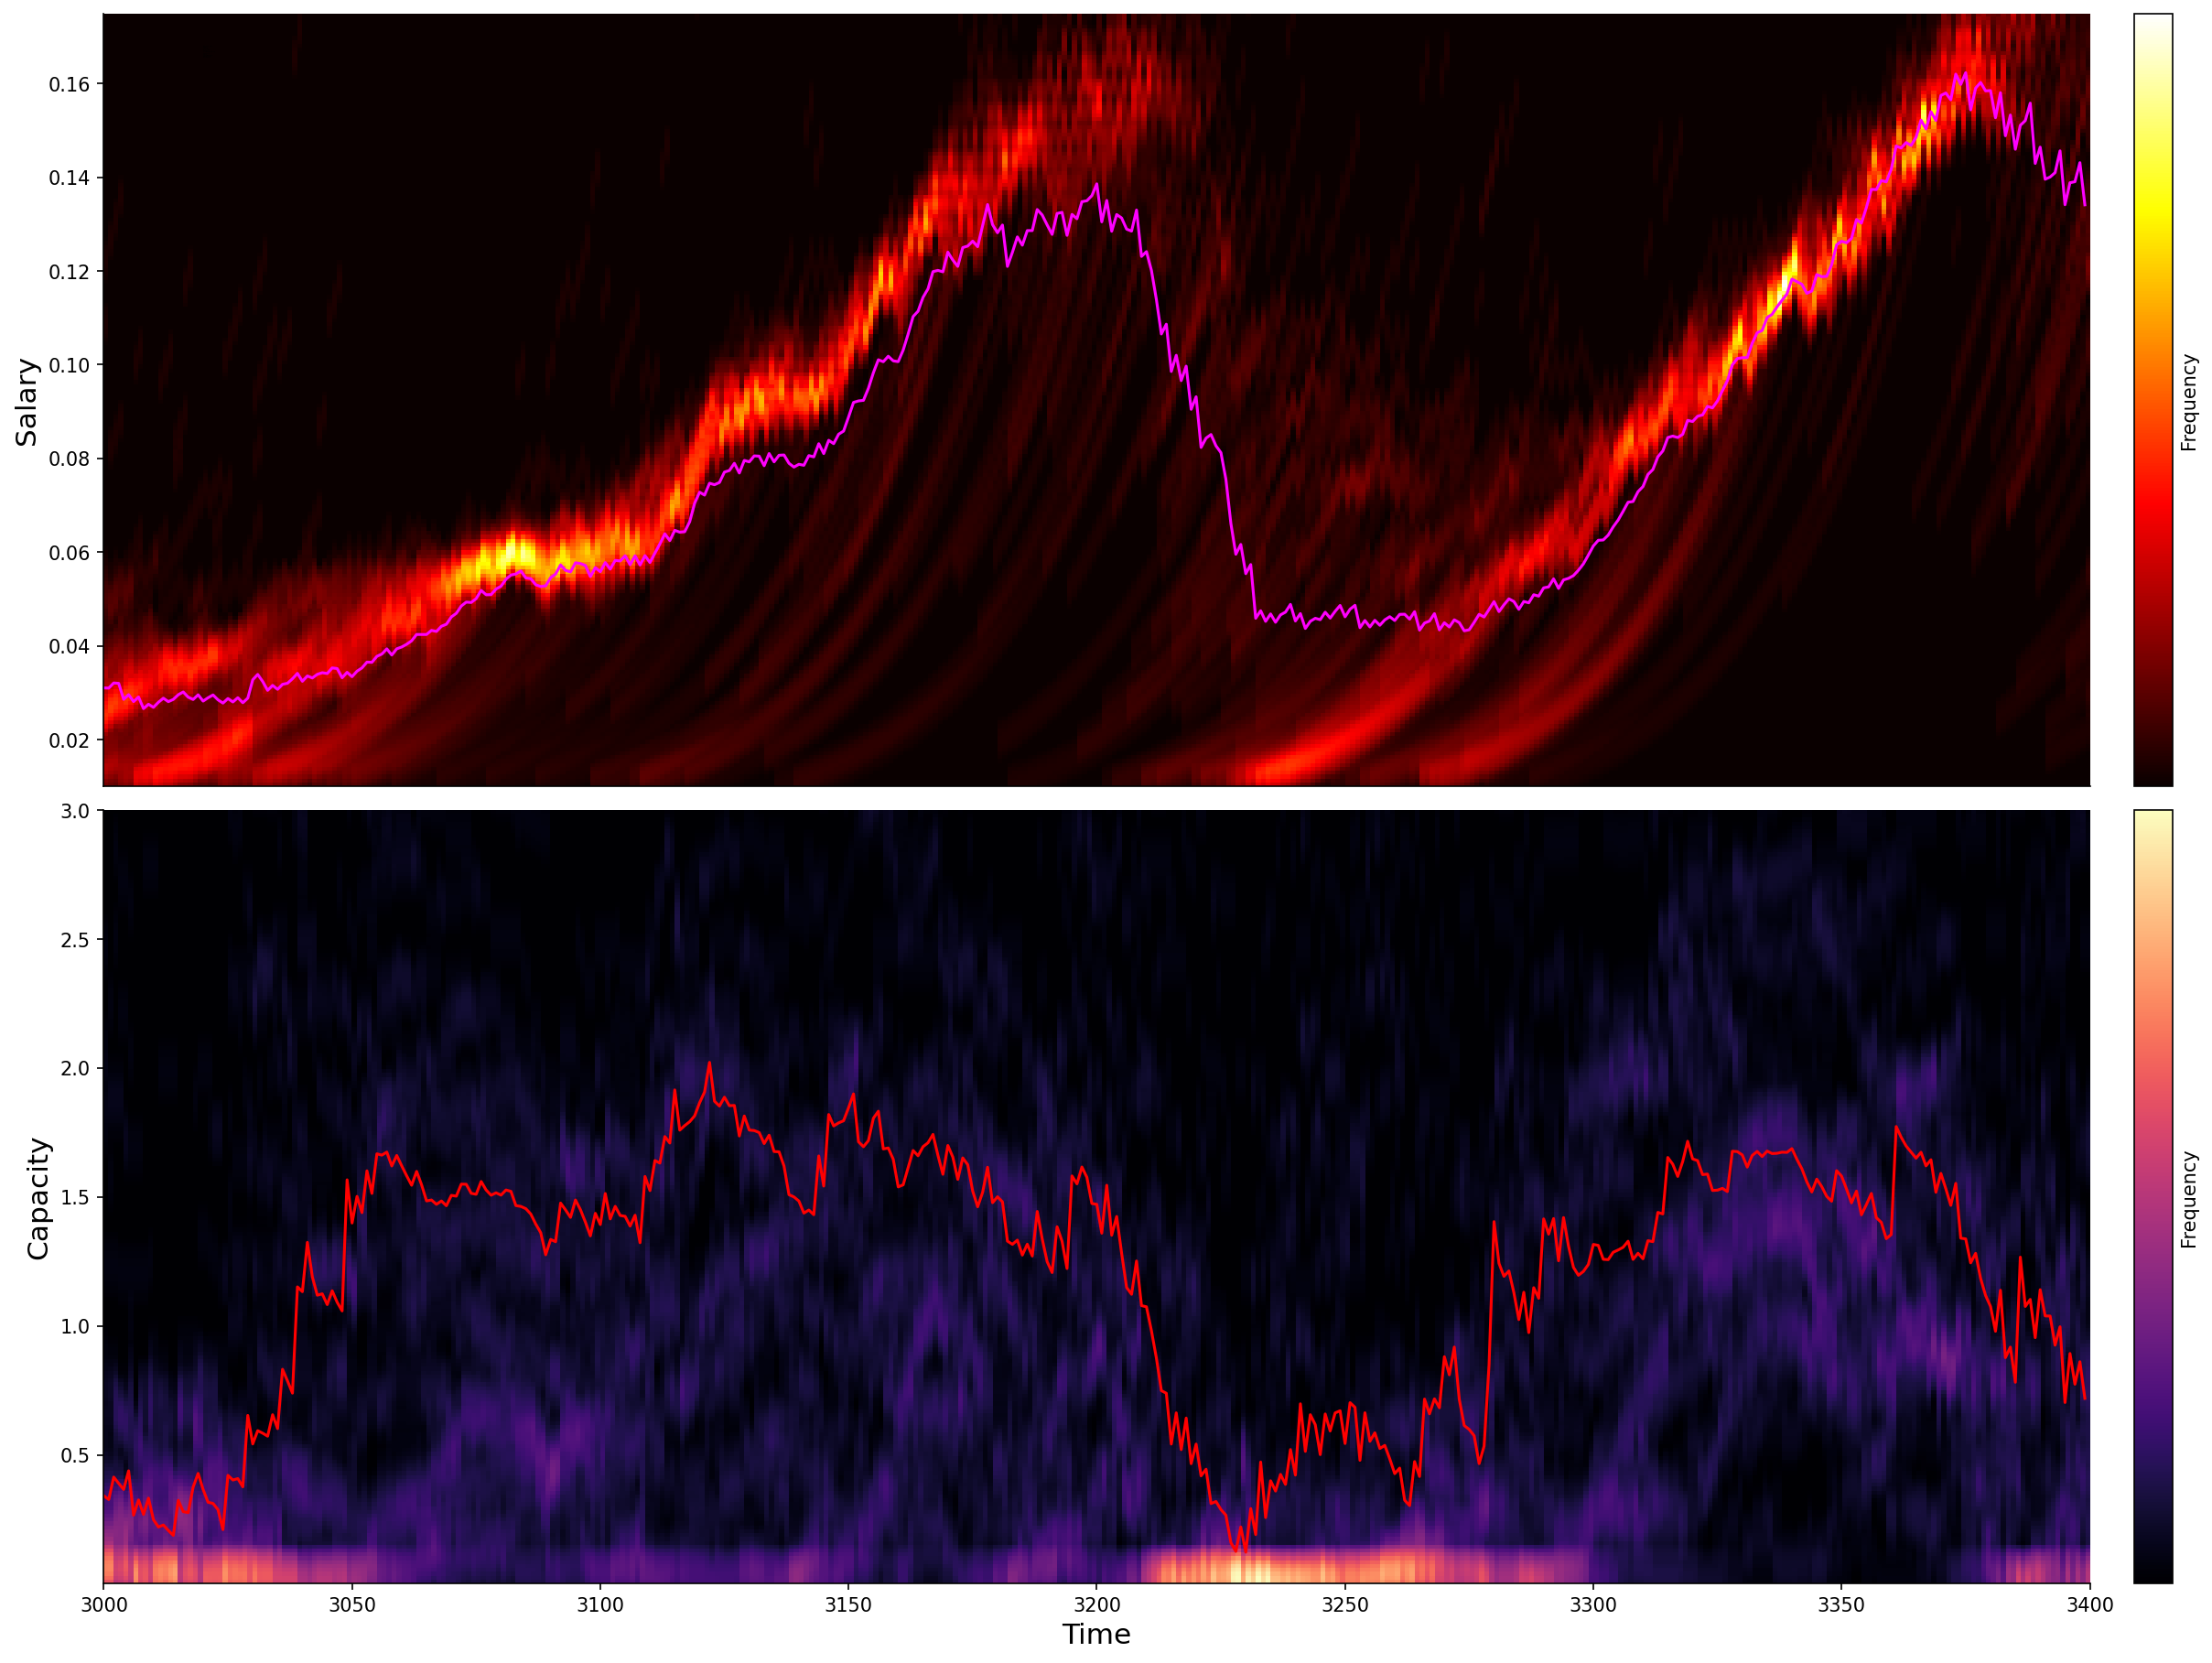

In [2]:
plotter.plot_running_KDE(bandwidth_s=0.005, bandwidth_d=0.15, s_lim=(0.01, 0.175), d_lim=(0.001, 3), eval_points=200, kernel="epanechnikov", show_mean=True)

In [ ]:
plotter.single_KDE(x_data="delta_debt", time_point=70, eval_points=200, bandwidth=0.045, kernel="epanechnikov")

### General behaviour

In [ ]:
plotter.plot_salary(show_spread=False)

In [ ]:
plotter.plot_debt()

In [ ]:
plotter.plot_single_companies(N_plot=3)

In [ ]:
plotter.plot_salary_and_debt_distributions()

### Niche behaviour graphs

In [ ]:
plotter.plot_mutations()

In [ ]:
plotter.plot_bankrupt_new_salary()

In [ ]:
plotter.animate_w0_wnon0(skip_time_steps=5);

In [ ]:
plotter.plot_time_from_income_change_to_bankruptcy_distribution(show_plot=True)

In [ ]:
plotter.plot_survivors(show_peak_plot=False)

### Parameter investigations

In [ ]:
# Get group name list
# Mutation size
m_values = np.geomspace(10*salary_min, 1000*salary_min, 14)
group_name_list_mutation = []
for m in m_values:
    create_data.mutation_magnitude = m
    group_name_list_mutation.append(create_data._get_group_name())
# Reset m
create_data.mutation_magnitude = mutation_magnitude

# Prob exponent
prob_exponent_values = [0, 1, 2, 4, 6, 8]
group_name_list_prob_expo = []
for exponent in prob_exponent_values:
    create_data.prob_exponent = exponent
    group_name_list_prob_expo.append(create_data._get_group_name())
# Reset exponent
create_data.prob_exponent = prob_exponent

# ds 
ds_values = [0.01, 0.02, 0.04, 0.08, 0.12, 0.16]
group_name_list_ds = []
for ds in ds_values:
    create_data.ds = ds
    group_name_list_ds.append(create_data._get_group_name())
# Reset ds
create_data.ds = salary_increase

# N variable, W const
NW_const = 250
NW_variable = np.array([25, 50, 100, 250, 500, 1000])

# Ratio constant N / W
N_W_ratio = 0.75
W_values_ratio = np.round(N_W_ratio * NW_variable, 0).astype(np.int32)

group_name_list_N_var_W_const = []
group_name_list_N_const_W_var = []
group_name_list_N_W_ratio = []

# Run N variable, W constant
create_data.W = NW_const
for N in NW_variable:
    create_data.N = N
    group_name_list_N_var_W_const.append(create_data._get_group_name())

# Run N constant, W variable
create_data.N = NW_const
for W in NW_variable:
    create_data.W = W
    group_name_list_N_const_W_var.append(create_data._get_group_name())

# Run N / W ratio
for N, W in zip(NW_variable, W_values_ratio):
    create_data.N = N
    create_data.W = W
    group_name_list_N_W_ratio.append(create_data._get_group_name())
    
# Reset N and W
create_data.N = number_of_companies
create_data.W = number_of_workers

In [ ]:
create_data.repeated_m_runs(N_repeat=10, m_values=m_values)
create_data.multiple_s_min_runs(s_min_list=np.geomspace(1e-5, 3*1e-3, 8))
create_data.multiple_ds_runs(ds_list=[0.01, 0.02, 0.04, 0.8, 0.16, 0.32])

In [ ]:
# Store data
for m in m_values:
    print("m = ", m)
    create_data.mutation_magnitude = m
    create_data.store_data_in_group()

# Store Prob exponent data
for expo in prob_exponent_values:
    print("expo = ", expo) 
    create_data.prob_exponent = expo
    create_data.store_data_in_group()
    
# Store ds data
for ds in ds_values:
    print("ds = ", ds)
    create_data.ds = ds
    create_data.store_data_in_group()
    
# Store N variable, W const
# print("Running N variable, W constant")
# create_data.W = NW_const
# for N in NW_variable:
#     print("N = ", N, "W = ", NW_const)
#     create_data.N = N
#     create_data.store_data_in_group()

# # Store N const, W variable
# print("\nRunning N constant, W variable")
# print("")
# create_data.N = NW_const
# for W in NW_variable:
#     print("N = ", NW_const, "W = ", W)
#     create_data.W = W
#     create_data.store_data_in_group()

# Store N / W ratio
print("\nRunning N/W ratio")
for N, W in zip(NW_variable, W_values_ratio):
    print("N = ", N, "W = ", W)
    create_data.N = N
    create_data.W = W
    create_data.store_data_in_group()

In [ ]:
plotter.plot_multiple_ds_v2(group_name_list_ds)

In [ ]:
plotter.plot_multiple_s_min()

In [ ]:
plotter.plot_N_var_W_const(group_name_list_N_var_W_const)
plotter.plot_N_W_ratio(group_name_list_N_W_ratio)
plotter.plot_N_const_W_var(group_name_list_N_const_W_var)


In [ ]:
plotter.plot_repeated_mutation_size()
plotter.plot_multiple_prob_expo(group_name_list_prob_expo)
plotter.plot_multiple_mutation_size(group_name_list_mutation)